In [3]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = './AB_NYC_2019.csv'
df = pd.read_csv(path)
print(df.head())
print(df.shape)
print(df.shape[0])
print(df.shape[1])
print(df.index)

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
pd.DataFrame(df.isnull().sum(), columns = ['Count Null'])

,Count Null
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [6]:
def to_today(date1):
    date2= datetime.datetime.strptime('2019-12-31',"%Y-%m-%d")
    if date1<date2:
        num=(date2-date1).days
        return num
    else:
        return 100000
df['last_review'] = pd.to_datetime(df['last_review'])
df['reviews_per_month'].fillna(0, inplace = True)
df['last_review_to_today'] = df['last_review'].apply(lambda x:to_today(x))
df.drop(['id','host_id','host_name','last_review'], axis=1, inplace=True) 

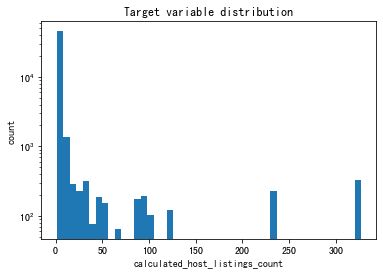

In [20]:
df['calculated_host_listings_count'].plot.hist(bins = df['calculated_host_listings_count'].nunique(),log=True)
plt.xlabel('calculated_host_listings_count')
plt.ylabel('count')
plt.title('Target variable distribution')
plt.savefig('1.jpg',bbox_inches='tight',dpi=500)
plt.show()

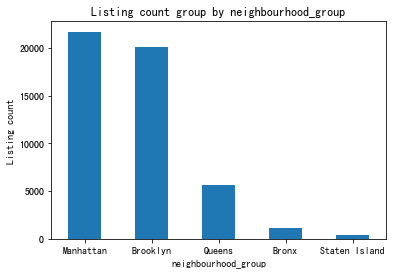

In [28]:
viz_nbhg = df.neighbourhood_group.value_counts().plot(kind = 'bar')
viz_nbhg.set_xticklabels(viz_nbhg.get_xticklabels(), rotation=0)
viz_nbhg.set_title('Listing count group by neighbourhood_group')
viz_nbhg.set_xlabel('neighbourhood_group')
viz_nbhg.set_ylabel('Listing count')
fig = viz_nbhg.get_figure()
fig.savefig("2.jpg",dpi=500)

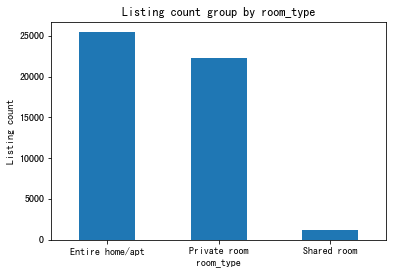

In [29]:
viz_rm = df.room_type.value_counts().plot(kind = 'bar')
viz_rm.set_xticklabels(viz_rm.get_xticklabels(), rotation = 0)
viz_rm.set_title('Listing count group by room_type')
viz_rm.set_xlabel('room_type')
viz_rm.set_ylabel('Listing count')
fig = viz_rm.get_figure()
fig.savefig("3.jpg",dpi=500)

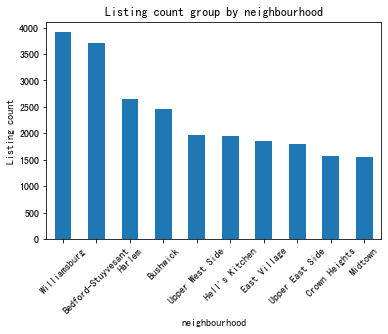

In [30]:
viz_nbh = df.neighbourhood.value_counts().head(10).plot(kind= 'bar')
viz_nbh.set_xticklabels(viz_nbh.get_xticklabels(), rotation=45)
viz_nbh.set_title('Listing count group by neighbourhood')
viz_nbh.set_xlabel('neighbourhood')
viz_nbh.set_ylabel('Listing count')
fig = viz_nbh.get_figure()
fig.savefig("4.jpg",dpi=500)

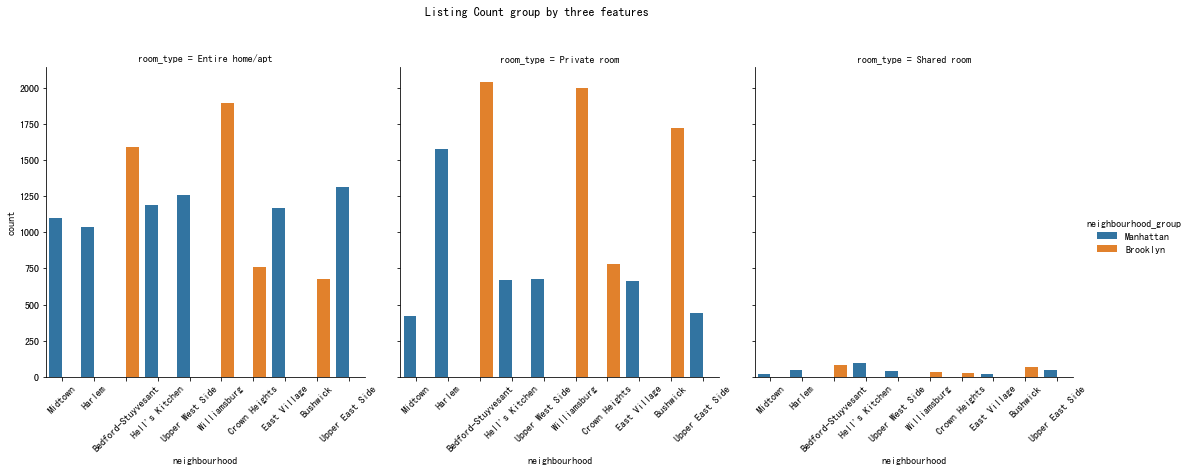

In [52]:
cp = sns.catplot(x = 'neighbourhood', hue = 'neighbourhood_group', col = 'room_type', 
            data = df.loc[df['neighbourhood'].isin( df.neighbourhood.value_counts().head(10).index)],
            kind = 'count').set_xticklabels(rotation=45)
cp.fig.suptitle('Listing Count group by three features',x=0.45,y=1.1)
cp.savefig("5.jpg",dpi=500)

Proportion of data sets：97.47%, 100.00%, 93.77%, 93.50%,99.04%,76.54%,


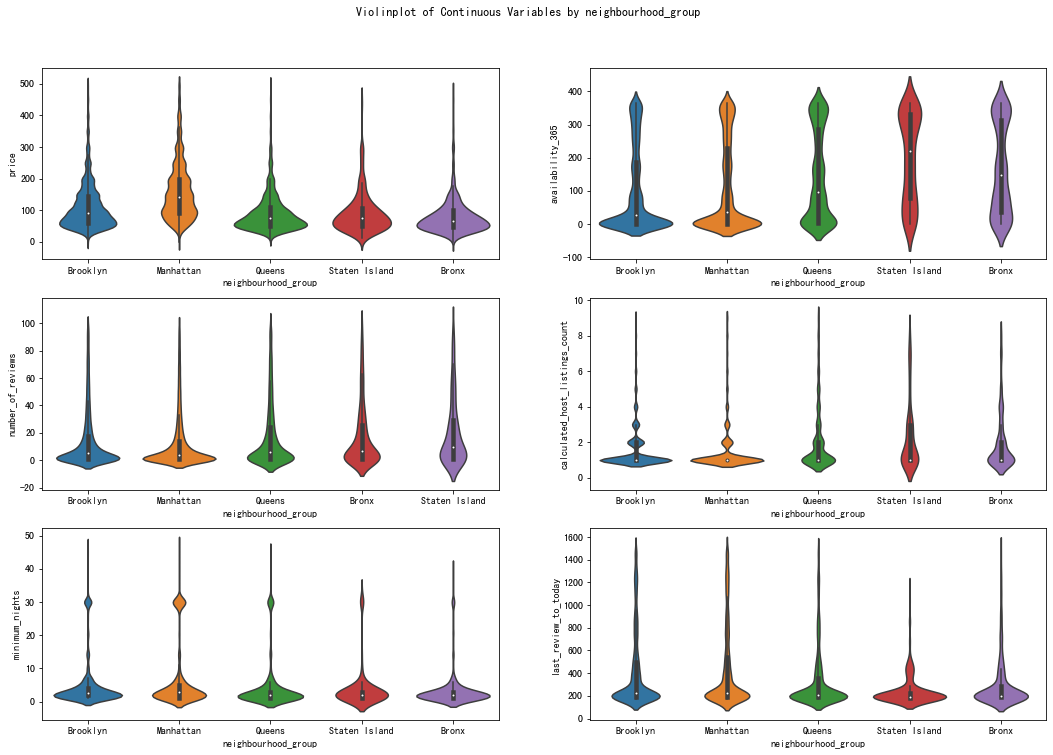

In [61]:
fig=plt.figure(4,figsize=(18,12))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

ax_1_per = 100*len(df[df.price<500])/len(df)
ax_2_per = 100*len(df)/len(df)
ax_3_per = 100*len(df[df.number_of_reviews<100])/len(df)
ax_4_per = 100*len(df[df.calculated_host_listings_count<10])/len(df)
ax_5_per = 100*len(df[df.minimum_nights < 50])/len(df)
ax_6_per = 100*len(df[df.last_review_to_today<1500])/len(df)

print('Proportion of data sets：%.2f%%, %.2f%%, %.2f%%, %.2f%%,%.2f%%,%.2f%%,' %(ax_1_per, ax_2_per, ax_3_per, ax_4_per, ax_5_per, ax_6_per))
sns.violinplot(x = 'neighbourhood_group', y = 'price',data = df[df.price<500], ax = ax1)
sns.violinplot(x = 'neighbourhood_group', y = 'availability_365',data = df, ax = ax2)
sns.violinplot(x = 'neighbourhood_group', y = 'number_of_reviews',data = df[df.number_of_reviews<100], ax= ax3)
sns.violinplot(x = 'neighbourhood_group', y = 'calculated_host_listings_count',data = df[df.calculated_host_listings_count<10], ax= ax4)
sns.violinplot(x = 'neighbourhood_group', y = 'minimum_nights',data = df[df.minimum_nights < 50], ax= ax5)
sns.violinplot(x = 'neighbourhood_group', y = 'last_review_to_today',data = df[df.last_review_to_today<1500], ax= ax6)
fig.suptitle('Violinplot of Continuous Variables by neighbourhood_group',x=0.5,y=0.95)
fig.savefig("6.jpg",dpi=1000)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='calculated_host_listings_count'>

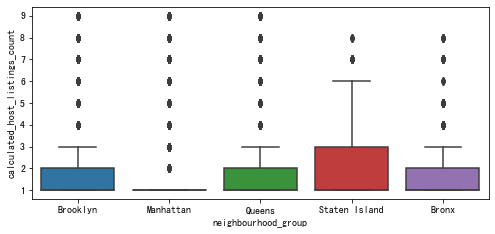

In [11]:
fig=plt.figure(4,figsize=(18,12))
ax4=fig.add_subplot(3,2,1)
ax_4_per = 100*len(df[df.calculated_host_listings_count<10])/len(df)
sns.boxplot(x = 'neighbourhood_group', y = 'calculated_host_listings_count',data = df[df.calculated_host_listings_count<10], ax= ax4)
fig.suptitle('Boxplot of Continuous Variables by neighbourhood_group',x=0.5,y=0.95)
fig.savefig("6.5.jpg",dpi=500)

Proportion of data sets：97.47%, 100.00%, 93.77%, 93.50%,99.04%,76.54%,


<AxesSubplot:xlabel='room_type', ylabel='last_review_to_today'>

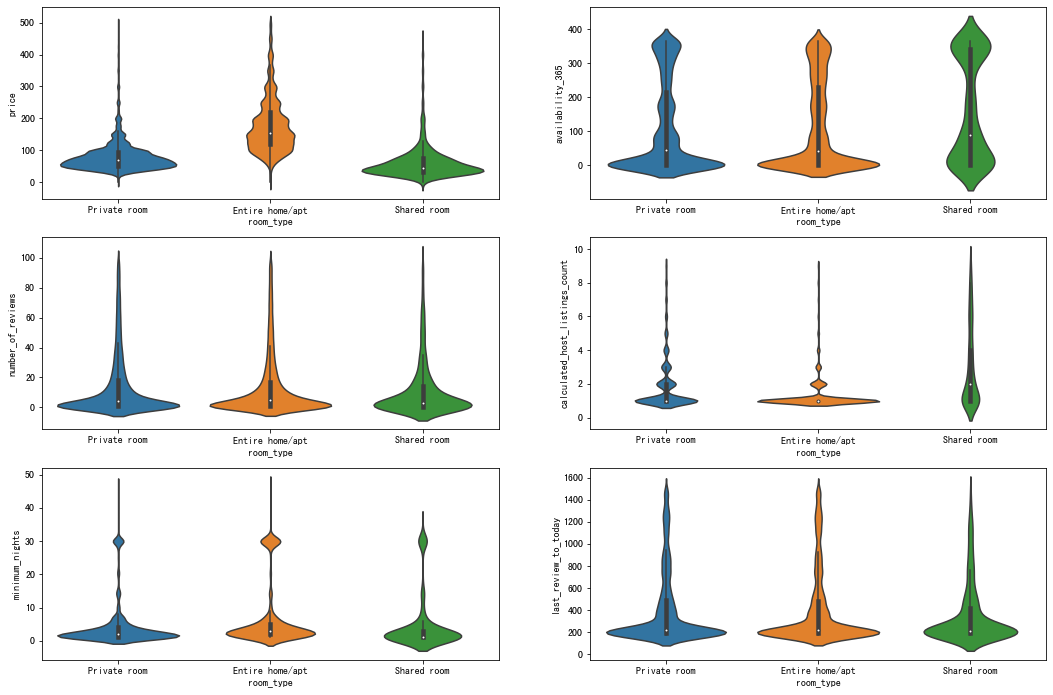

In [12]:
fig=plt.figure(4,figsize=(18,12))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

ax_1_per = 100*len(df[df.price<500])/len(df)
ax_2_per = 100*len(df)/len(df)
ax_3_per = 100*len(df[df.number_of_reviews<100])/len(df)
ax_4_per = 100*len(df[df.calculated_host_listings_count<10])/len(df)
ax_5_per = 100*len(df[df.minimum_nights < 50])/len(df)
ax_6_per = 100*len(df[df.last_review_to_today<1500])/len(df)

print('Proportion of data sets：%.2f%%, %.2f%%, %.2f%%, %.2f%%,%.2f%%,%.2f%%,' %(ax_1_per, ax_2_per, ax_3_per, ax_4_per, ax_5_per, ax_6_per))
sns.violinplot(x = 'room_type', y = 'price',data = df[df.price<500], ax = ax1)
sns.violinplot(x = 'room_type', y = 'availability_365',data = df, ax = ax2)
sns.violinplot(x = 'room_type', y = 'number_of_reviews',data = df[df.number_of_reviews<100], ax= ax3)
sns.violinplot(x = 'room_type', y = 'calculated_host_listings_count',data = df[df.calculated_host_listings_count<10], ax= ax4)
sns.violinplot(x = 'room_type', y = 'minimum_nights',data = df[df.minimum_nights < 50], ax= ax5)
sns.violinplot(x = 'room_type', y = 'last_review_to_today',data = df[df.last_review_to_today<1500], ax= ax6)
fig.suptitle('Violinplot of Continuous Variables by room_type',x=0.5,y=0.95)
fig.savefig("7.jpg",dpi=500)

<AxesSubplot:xlabel='room_type', ylabel='calculated_host_listings_count'>

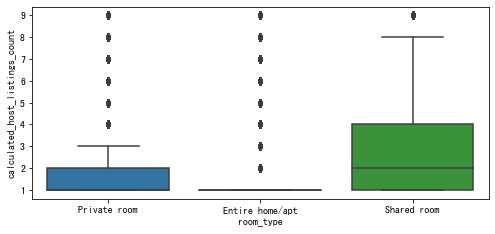

In [13]:
fig=plt.figure(4,figsize=(18,12))
ax4=fig.add_subplot(3,2,4)
ax_4_per = 100*len(df[df.calculated_host_listings_count<10])/len(df)
sns.boxplot(x = 'room_type', y = 'calculated_host_listings_count',data = df[df.calculated_host_listings_count<10], ax= ax4)
fig.suptitle('Boxplot of Continuous Variables by room_type',x=0.5,y=0.95)
fig.savefig("7.5.jpg",dpi=500)

In [62]:
#sns.scatterplot(data = df,x='calculated_host_listings_count',y='price')

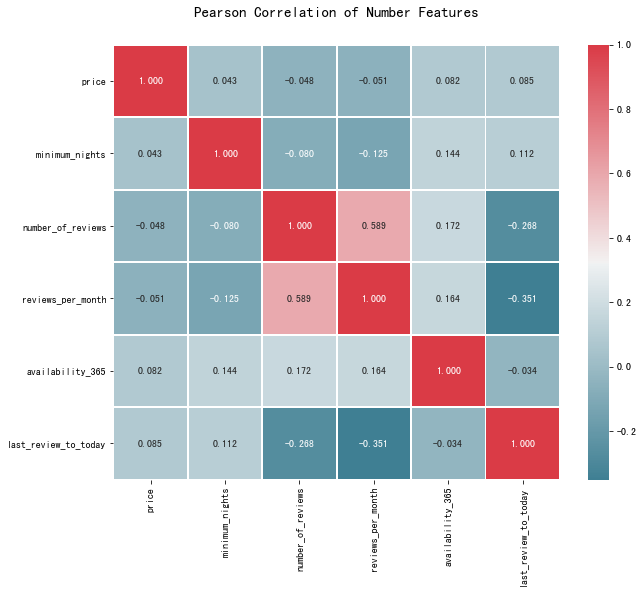

In [63]:
num_field = [
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'availability_365',
'last_review_to_today',
]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[num_field].corr(),annot=True,
                    cmap = sns.diverging_palette(220, 10, as_cmap = True),
                    linewidths=.9, fmt= '.3f',ax = ax)
plt.title('Pearson Correlation of Number Features', y=1.05, size=15)
plt.savefig('8.jpg',dpi=500)

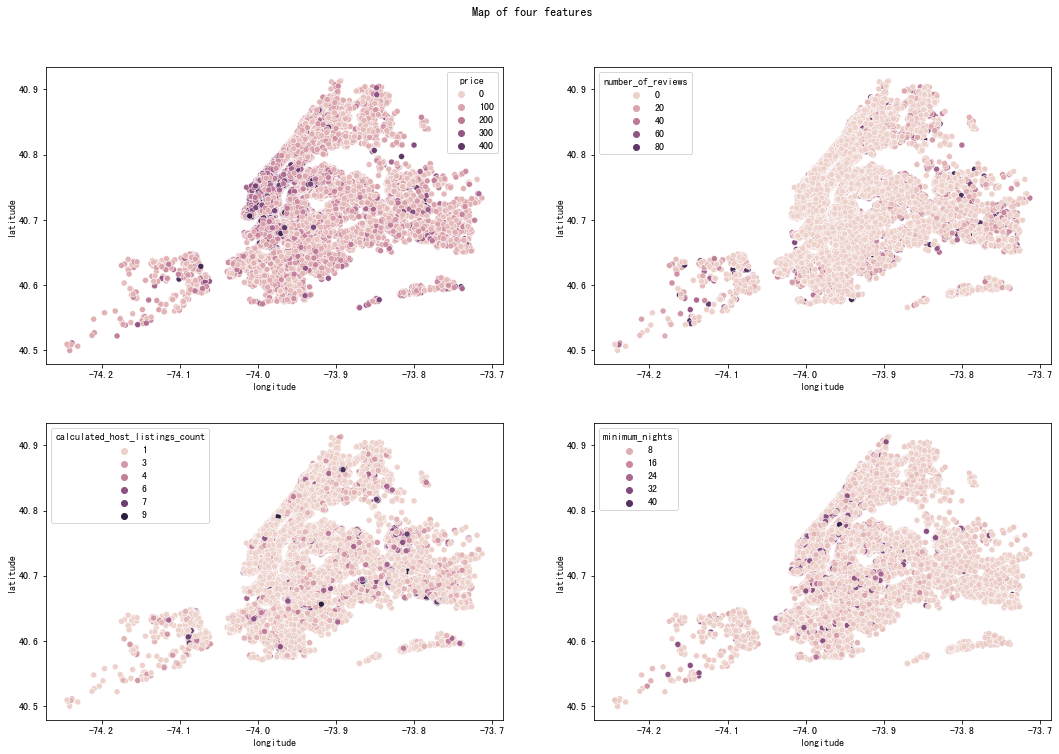

In [65]:
fig=plt.figure(4,figsize=(18,12))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.scatterplot(x= 'longitude', y='latitude', hue = 'price', data = df[df.price < 500], ax=ax1)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'number_of_reviews', data = df[df.number_of_reviews<100], ax=ax2)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'calculated_host_listings_count', data = df[df.calculated_host_listings_count<10], ax=ax3)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'minimum_nights', data = df[df.minimum_nights < 50], ax=ax4)
fig.suptitle('Map of four features',x=0.5,y=0.95)
fig.savefig("8.jpg",dpi=500)

In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

cag_col = [
        'neighbourhood_group', 'neighbourhood', 'room_type',
]
x_col = ['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month','availability_365', 'last_review_to_today']
y_col = ['calculated_host_listings_count']
#处理类型字段
label = LabelEncoder()
for i in cag_col:
    df[i] = label.fit_transform(df[i])
X = df[x_col]
Y = df[y_col]
#数据集分割
#X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0)
random_state = 42
# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,Y,test_size = 0.2,random_state=random_state)
print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 
    # the validation set contains different points in each iteration
    print(X_val.head())
    


(39116, 11) (39116, 1)
test set: (9779, 11) (9779, 1)
   training set: (31292, 11) (31292, 1)
   validation set: (7824, 11) (7824, 1)
       neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
7275                     3            220  40.74705  -73.89564          1   
46572                    2            201  40.76786  -73.95639          0   
19902                    2            209  40.73316  -74.00476          0   
38560                    2             64  40.72330  -73.97882          1   
34913                    1             13  40.68440  -73.93580          0   

       price  minimum_nights  number_of_reviews  reviews_per_month  \
7275      38               5                 13               0.25   
46572    260               7                  1               1.00   
19902    147               1                 42               1.32   
38560     79               1                  4               0.61   
34913    125               2                 51      

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

disperse_features=df[cag_col]
disperse_feature=pd.get_dummies(disperse_features)
print(disperse_feature.head())
continuous_col = ['latitude', 'longitude','price', 'minimum_nights', 'number_of_reviews','reviews_per_month','availability_365', 'last_review_to_today']
continuous_features = df[continuous_col]
scaler=StandardScaler()
continuous_features=scaler.fit_transform(continuous_features)
print(continuous_features.shape)
print(continuous_features)

   neighbourhood_group  neighbourhood  room_type
0                    1            108          1
1                    2            127          0
2                    2             94          1
3                    1             41          0
4                    2             61          0
(48895, 8)
[[-1.4938492  -0.43765209 -0.01549307 ... -0.55151094  1.91625031
  -0.50905911]
 [ 0.45243602 -0.68463915  0.30097355 ... -0.4450791   1.84027456
  -0.51437834]
 [ 1.46839948  0.22249666 -0.01132904 ... -0.68298556  1.91625031
   1.96567576]
 ...
 [ 1.57348017  0.07582101 -0.15707024 ... -0.68298556 -0.65173008
   1.96567576]
 [ 0.52377353 -0.84388081 -0.4069123  ... -0.68298556 -0.84166946
   1.96567576]
 [ 0.64352518 -0.8050995  -0.2611711  ... -0.68298556 -0.68212038
   1.96567576]]


In [20]:
X.shape

(48895, 11)

In [22]:
onehot_ftrs = ['neighbourhood_group','neighbourhood','room_type']
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
enc.fit(X_train[onehot_ftrs]) 
print('feature names:',enc.get_feature_names(onehot_ftrs))

feature names: ['neighbourhood_group_0' 'neighbourhood_group_1' 'neighbourhood_group_2'
 'neighbourhood_group_3' 'neighbourhood_group_4' 'neighbourhood_0'
 'neighbourhood_1' 'neighbourhood_2' 'neighbourhood_3' 'neighbourhood_4'
 'neighbourhood_5' 'neighbourhood_6' 'neighbourhood_7' 'neighbourhood_8'
 'neighbourhood_9' 'neighbourhood_10' 'neighbourhood_11'
 'neighbourhood_12' 'neighbourhood_13' 'neighbourhood_14'
 'neighbourhood_15' 'neighbourhood_16' 'neighbourhood_17'
 'neighbourhood_18' 'neighbourhood_19' 'neighbourhood_20'
 'neighbourhood_21' 'neighbourhood_22' 'neighbourhood_23'
 'neighbourhood_24' 'neighbourhood_25' 'neighbourhood_26'
 'neighbourhood_27' 'neighbourhood_28' 'neighbourhood_29'
 'neighbourhood_30' 'neighbourhood_31' 'neighbourhood_32'
 'neighbourhood_33' 'neighbourhood_34' 'neighbourhood_35'
 'neighbourhood_36' 'neighbourhood_37' 'neighbourhood_38'
 'neighbourhood_39' 'neighbourhood_40' 'neighbourhood_41'
 'neighbourhood_42' 'neighbourhood_43' 'neighbourhood_44'
 'ne

In [24]:
onehot_train = enc.transform(X_train[onehot_ftrs]) 
print('transformed train features:') 
print(onehot_train) 
# transform X_val 
onehot_val = enc.transform(X_val[onehot_ftrs]) 
print('transformed val features:') 
print(onehot_val)
# transform X_test 
onehot_test = enc.transform(X_test[onehot_ftrs]) 
print('transformed test features:') 
print(onehot_test) 

transformed train features:
[[0. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
transformed val features:
[[0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]]
transformed test features:
[[0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


In [28]:
Xtoy_train = pd.DataFrame(X_train[continuous_col]) 
Xtoy_test = pd.DataFrame(X_test[continuous_col])
Xtoy_val = pd.DataFrame(X_val[continuous_col]) 
scaler = StandardScaler() 
print(scaler.fit_transform(Xtoy_train))
print(scaler.transform(Xtoy_val)) 
print(scaler.transform(Xtoy_test)) 


[[-0.24341632 -0.06231825  0.5719473  ... -0.1398098  -0.85425161
  -0.51886586]
 [ 2.19733801  0.25901014 -0.34310748 ... -0.57895878 -0.86182554
  -0.51083128]
 [-0.71619812 -0.15273252 -0.3919104  ... -0.67792193 -0.86182554
   1.94765124]
 ...
 [ 0.98995137 -0.46170212 -0.09909287 ... -0.46762524  1.11496968
  -0.51802532]
 [ 0.84174964 -0.59569736 -0.01775467 ... -0.59751437 -0.84667768
  -0.51945918]
 [ 0.32011616  0.149082   -0.13976197 ... -0.65936634 -0.86182554
  -0.49263604]]
[[-0.9857057   0.19006113 -0.36344203 ... -0.67792193 -0.86182554
   1.94765124]
 [-0.49206588  0.4788664  -0.05842377 ... -0.38103248 -0.86182554
  -0.51842086]
 [ 0.50070271  2.68154866  0.18559084 ... -0.57895878 -0.86182554
  -0.51552842]
 ...
 [-1.26527636 -0.82379281 -0.1112936  ... -0.65936634  1.90265819
  -0.49446546]
 [-0.95661425  0.31798539 -0.29430456 ...  0.14470926  0.94076933
  -0.51963223]
 [ 1.03002072 -0.47991507  0.14492174 ... -0.67792193  0.32728116
   1.94765124]]
[[-1.56497318 -0